# Fourier Series

The Fourier series of an $L-$periodic function $f: \mathbb{R} \to \mathbb{R}$ is
    $$f(x)= \frac{a_0}{2} + \sum_{n=1}^{\infty}\left[a_{n} \cos \left(\frac{2 \pi n x}{P}\right)+b_{n} \sin \left(\frac{2 \pi n x}{P}\right)\right]$$ <br/>
where the coefficients can be found by taking the inner products 
    $$a_n = \langle f(x),\,\cos \left(\frac{2 \pi n x}{P}\right)\rangle = \int_{-L}^{L} f(x) \cos \left(\frac{2 \pi n x}{P}\right)\,dx, \qquad b_n = \langle f(x), \,\sin \left(\frac{2 \pi n x}{P}\right)\rangle = \int_{-L}^{L} f(x) \sin \left(\frac{2 \pi n x}{P}\right)\,dx .$$ <br/>
Formally, a Fourier series is just a change of coordinates of a function $f(x)$ into an infinite-dimensional orthogonal function space spanned by sines and cosines. We shall consider the examples of a triangular wave,
    $$f(x)=\left\{\begin{aligned}
0, & \text { for } x \in[-\pi, \pi / 2) \\
1+2 x / \pi, & \text { for } x \in[-\pi / 2,0) \\
1-2 x / \pi, & \text { for } x \in[0, \pi / 2) \\
0, & \text { for } x \in[\pi / 2, \pi)
\end{aligned}\right. ,$$ <br/>
and a square wave,
    $$f(x)=\left\{\begin{aligned}
0, & \text { for } x \in[-\pi, \pi / 2) \\
1, & \text { for } x \in[-\pi / 2, \pi / 2) \\
0, & \text { for } x \in[\pi / 2, \pi)
\end{aligned}\right. .$$ <br/>
We will then examine the Gibbs phenomenon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
def fourier_series(f, x, L, N):
    '''
    f: function of interest
    x: domain
    L: period
    N: truncates the sum to N terms
    
    '''
    # Step size
    dx = 0.0001 
    
    # Computes f(x)
    f = np.array(list(map(f, x)))
    
    # Computing the first coefficient
    A0 = np.sum(f * dx) / 2
    
    # Instantiate the Fourier coefficients 
    As = np.zeros(N)
    Bs = np.zeros(N)
    As[0] = A0           # Appending the first term to As

    
    FS = A0 # Instantiating the Fourier series 
    # We shall approximate the integrals by summing up a large number of slices
    for n in range(N):
        # Computes the Fourier coefficients
        As[n] = np.sum(f * np.cos(np.pi * (n+1) * x / L)) * dx
        Bs[n] = np.sum(f * np.sin(np.pi * (n+1) * x / L)) * dx
        
        # Computes the nth term of the Fourier series
        FS += As[n]*np.cos(np.pi * (n+1) * x / L)  + Bs[n]*np.sin(np.pi * (n+1) * x / L)

    return FS

# Parabola example

<IPython.core.display.Javascript object>


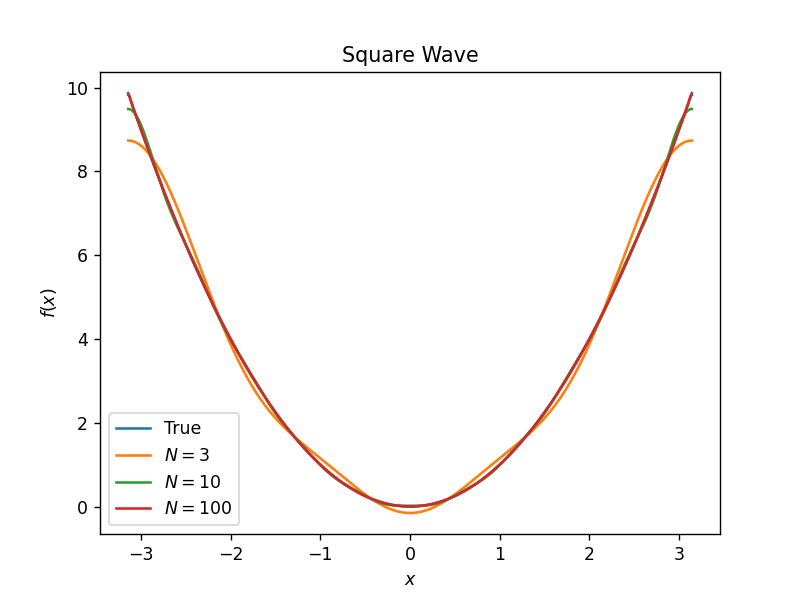

In [3]:
def parabola(x):
    return x**2
    
dx = 0.0001 # the x array will come in dx steps 
L = np.pi # Period of the wave
x = L * np.arange(-1 + dx, 1 + dx, dx)

# Plot
plt.figure()
plt.plot(x, np.array(list(map(parabola, x))), label="True")

Ns = [3,10,100]
for N in Ns:
    plt.plot(x, fourier_series(parabola, x, L, N=N), label=r"$N = {}$".format(N))
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.title("Square Wave")
plt.legend()

# Triangular wave

<IPython.core.display.Javascript object>


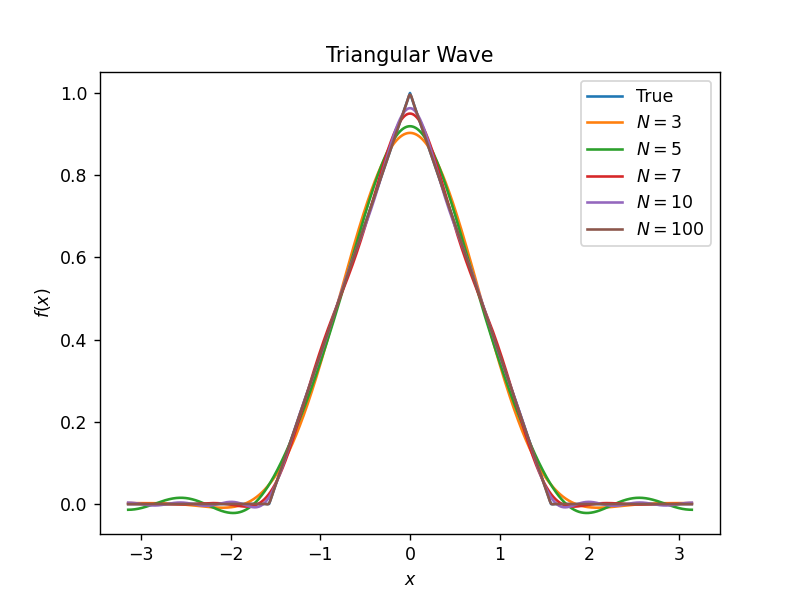

In [4]:
def hat_fxn(x):
    if -np.pi <= x < -np.pi/2:
        return 0
    
    elif -np.pi/2 <= x < 0:
        return 1 + (2*x / np.pi)
    
    elif 0 <= x < np.pi/2:
        return 1 - (2*x / np.pi)
    
    elif np.pi/2 <= x < np.pi:
        return 0
    
dx = 0.0001 # the x array will come in dx steps 
L = np.pi # half-period of the wave
x = L * np.arange(-1 + dx, 1 + dx, dx)

plt.figure()
plt.plot(x, np.array(list(map(hat_fxn, x))), label="True")

Ns = [3,5,7,10,100]
for N in Ns:
    plt.plot(x, fourier_series(hat_fxn, x, L, N=N), label=r"$N = {}$".format(N))
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.title("Triangular Wave")
plt.legend()

# Square wave

<IPython.core.display.Javascript object>


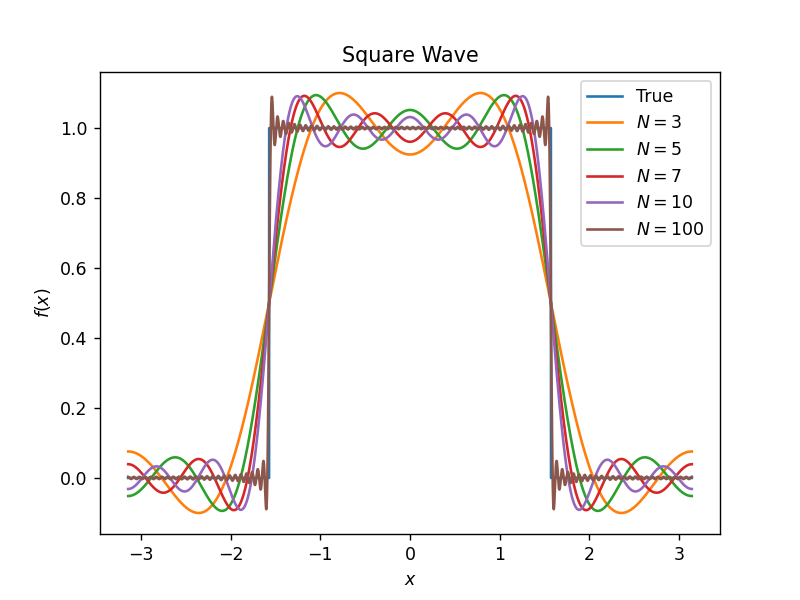

In [5]:
def square_fx(x):
    if -np.pi <= x < -np.pi/2:
        return 0
    
    elif -np.pi/2 <= x < np.pi/2:
        return 1
    
    elif np.pi/2 <= x < np.pi:
        return 0
    
dx = 0.0001 # the x array will come in dx steps 
L = np.pi # Period of the wave
x = L * np.arange(-1 + dx, 1 + dx, dx)

# Plot
plt.figure()
plt.plot(x, np.array(list(map(square_fx, x))), label="True")

Ns = [3,5,7,10,100]
for N in Ns:
    plt.plot(x, fourier_series(square_fx, x, L, N=N), label=r"$N = {}$".format(N))
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.title("Square Wave")
plt.legend()

The Fourier series is pretty smooth for continuous functions (including piece-wise functions), however for discontinuous functions we see large oscillations along the disconinuities. This is called the **Gibbs phenomenon**. 

# Fourier Transform

The Fourier transform of a function $f(x)$, denoted by $\hat{f}(\omega)$, is just a Fourier series but with an infinite period. The following are called the Fourier transform pair.

   \begin{equation}\begin{array}{l}
f(x)=\mathcal{F}^{-1}(\hat{f}(\omega))=\frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{f}(\omega) e^{i \omega x} d \omega \\
\hat{f}(\omega)=\mathcal{F}(f(x))=\int_{-\infty}^{\infty} f(x) e^{-i \omega x} d x
\end{array}\end{equation}

The convolution is defined as 
    $$(f * g)(x) = \int_{-\infty}^\infty f(x - \xi) g(\xi)\, d\xi$$

# Discrete Fourier Transform

When we are working with real-world data we need to approximate the Fourier transform on discrete vectors of data. The DFT is a mathematical transformation that can be written in terms of a big multiplication. The Fast Fourier Transform is a computationally efficient way of computing the DFT that scales to very large datasets. In other words, the FFT is how we compute the DFT.

Suppose we have a set of data points 
    $$\vec{x} = \left[x_1, x_2, \ldots, x_n\right]^T$$ <br/>
and we assume that there is an underlying function $f$
    $$\vec{f} = \left[f(x_1), f(x_2), \ldots, f(x_n)\right]^T$$ <br/>
What we want to do is to compute the Discrete Fourier Transform of the data vector $\vec{f}$.
    $$ \begin{pmatrix}\hat{f}_1\\ \hat{f}_2\\ \vdots \\\hat{f}_n \end{pmatrix} = \mathbb{D}\begin{pmatrix}f_1\\ f_2\\ \vdots \\f_n \end{pmatrix}$$
$\hat{f}$ are called the Fourier frequencies. $\hat{f}_1$ refers to how much of the lowest frequency is in the data, and so on. The $k$th Fourier coefficient is obtained using:
    $$\hat{f}_k = \sum_{j=0}^{n-1} f_j e^{-2 \pi i j k/n}$$
Once we have the $\hat{f}_k$'s then we can find the inverse DFT using 
    $$f_k = \frac1n \sum_{j=0}^{n-1} \hat{f}_j e^{2 \pi i j k/n}$$
We define the discrete Fourier basis as
    $$\omega_n = e^{-2 \pi i/n}.$$
so that 
    $$ \begin{pmatrix}\hat{f}_1\\ \hat{f}_2 \\ f_3 \\ \vdots \\\hat{f}_n \end{pmatrix} = \begin{pmatrix} 1 & 1 & 1 & \ldots & 1\\ 1 & \omega_n & \omega_n^2 & \ldots & \omega_n^{n-1}\\ 1 & \omega_n^2 & \omega_n^4 & \ldots & \omega_n^{2(n-1)} \\ \vdots & \vdots & \vdots & \ddots  & \vdots\\ 1 & \omega_n^{n-1} & \omega_n^{2(n-1)} & \ldots & \omega_n^{(n-1)^2}\end{pmatrix}\begin{pmatrix}f_1\\ f_2\\ f_3\\ \vdots \\f_n \end{pmatrix}$$
The big matrix is called the **DFT matrix**, which is a Vandermonde matrix.

<ipython-input-6-b180310a11cc>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  DFT[i,j] = w**((i-1) * (j-1))


<IPython.core.display.Javascript object>


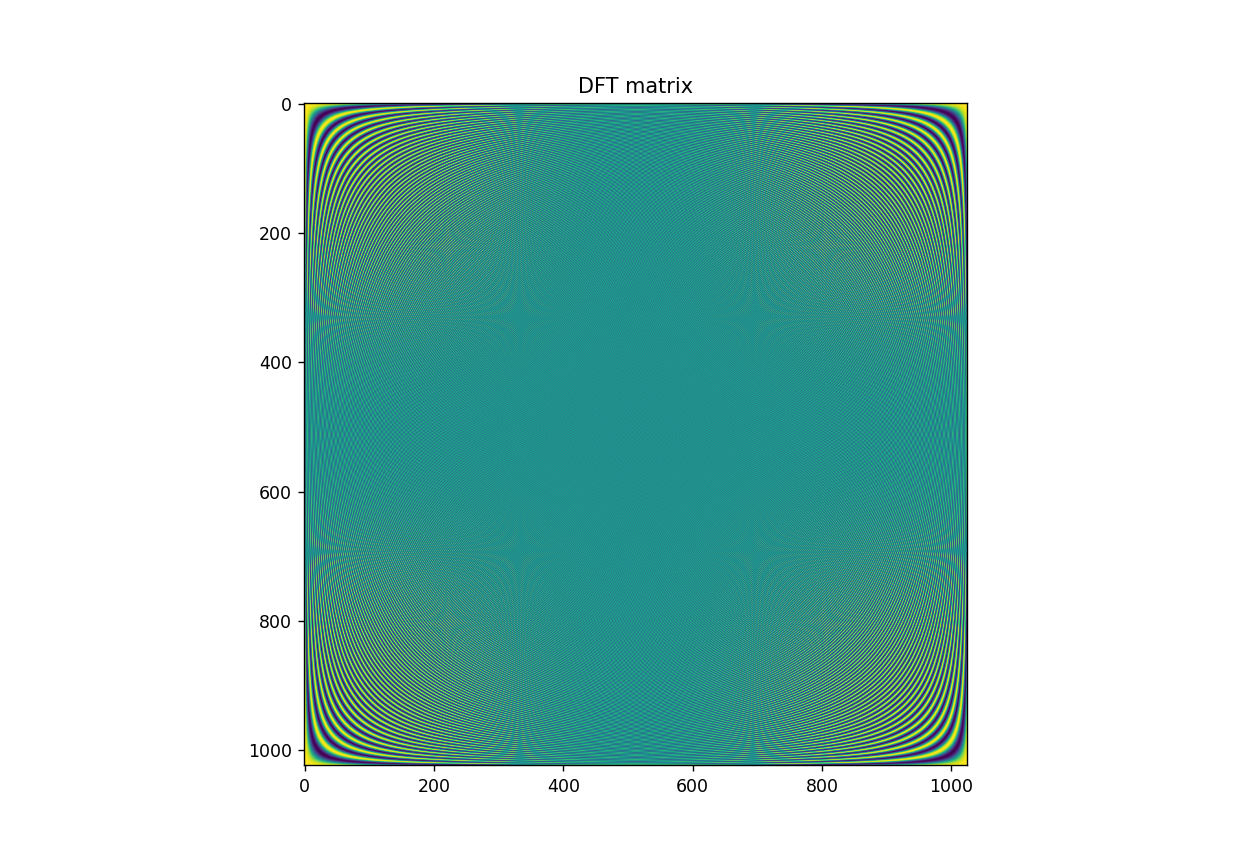

In [6]:
n = 1024
w = np.exp(-2 * np.pi * 1j / n)
DFT = np.zeros((n,n)) # instantiating the DFT matrix

for i in range(0,n):
    for j in range(0,n):
        DFT[i,j] = w**((i-1) * (j-1))
        
DFT = np.real(DFT)

plt.figure()
plt.imshow(DFT)
plt.title("DFT matrix")
plt.savefig("DFT_matrix",dpi=500)

# Fast Fourier Transform

The FFT is one of the most important algorithms developed due to its vast array of applications. We almost never compute for the DFT without the FFT algorithm. Multiplying the DFT to a vector leads to $O(n^2)$ operations (since we are dealing with an $n \times n$ matrix), which can be expensive. The FFT gives us the same output but at $O(n \log n)$ operations, which is called a **fast scaling** because of the $\log n$ term. With the FFT, we can approximate derivatives to solve PDEs, de-noise signals, data analysis, data compression of audio and images.

# De-noising data

<IPython.core.display.Javascript object>


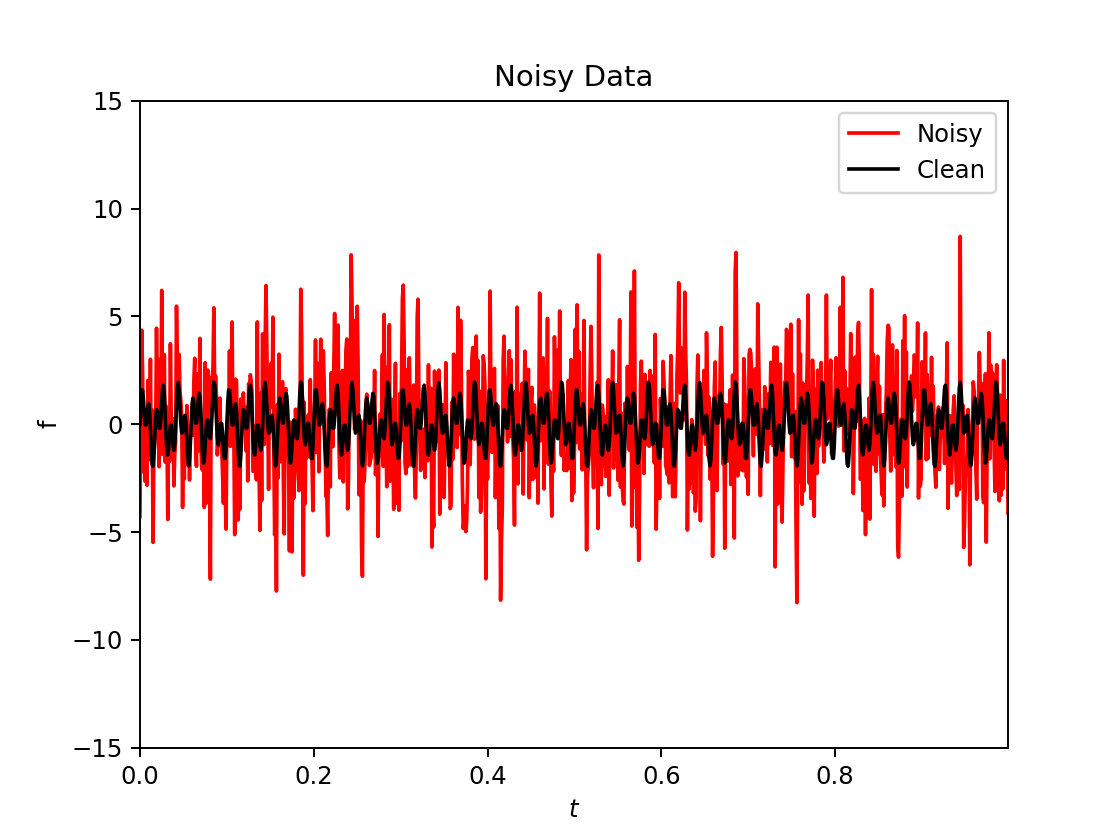

In [27]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) # combination of two signals, 50Hz and 120Hz
f_clean = f.copy()
f = f + 2.5 * np.random.randn(len(t)) # adds noise to the data

plt.figure()
plt.plot(t,f,color='r', lw=1.5, label='Noisy')
plt.plot(t,f_clean,color='k', lw=1.5, label='Clean')
plt.xlim(t[0], t[-1])
plt.ylim(-15,15)
plt.xlabel(r"$t$")
plt.ylabel('f')
plt.title('Noisy Data')
plt.legend()

### Check the dominant frequencies via FFT

<IPython.core.display.Javascript object>


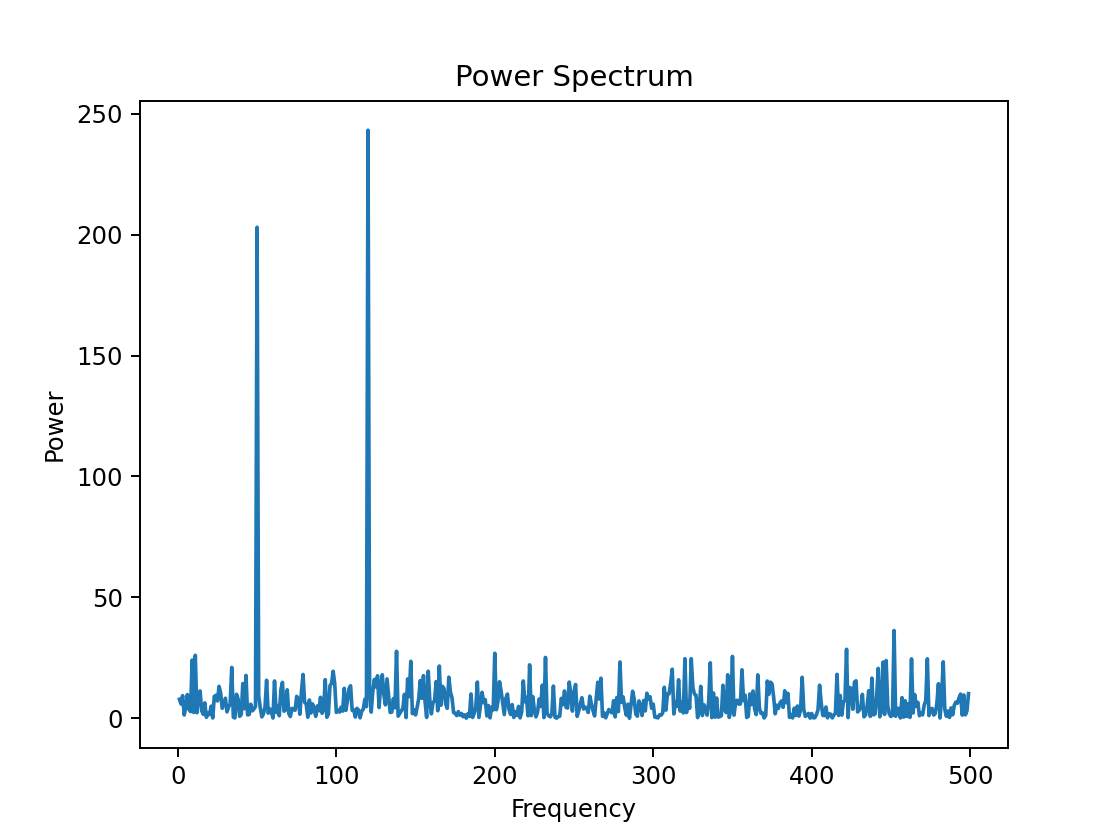

/home/val-ubuntu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Power Spectrum')

In [19]:
n = len(t)
fhat = np.fft.fft(f,n) # Compute DFT
PSD = fhat * np.conj(fhat) / n
frequencies = (1/(dt * n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype="int")

plt.figure()
plt.plot(frequencies[L], PSD[L])
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Power Spectrum")

Even though that the signal is noisy, we can see that the signal has two well-defined peaks. We filter the frequencies that are less than 100 Power.

### Filtering the white noise

<IPython.core.display.Javascript object>


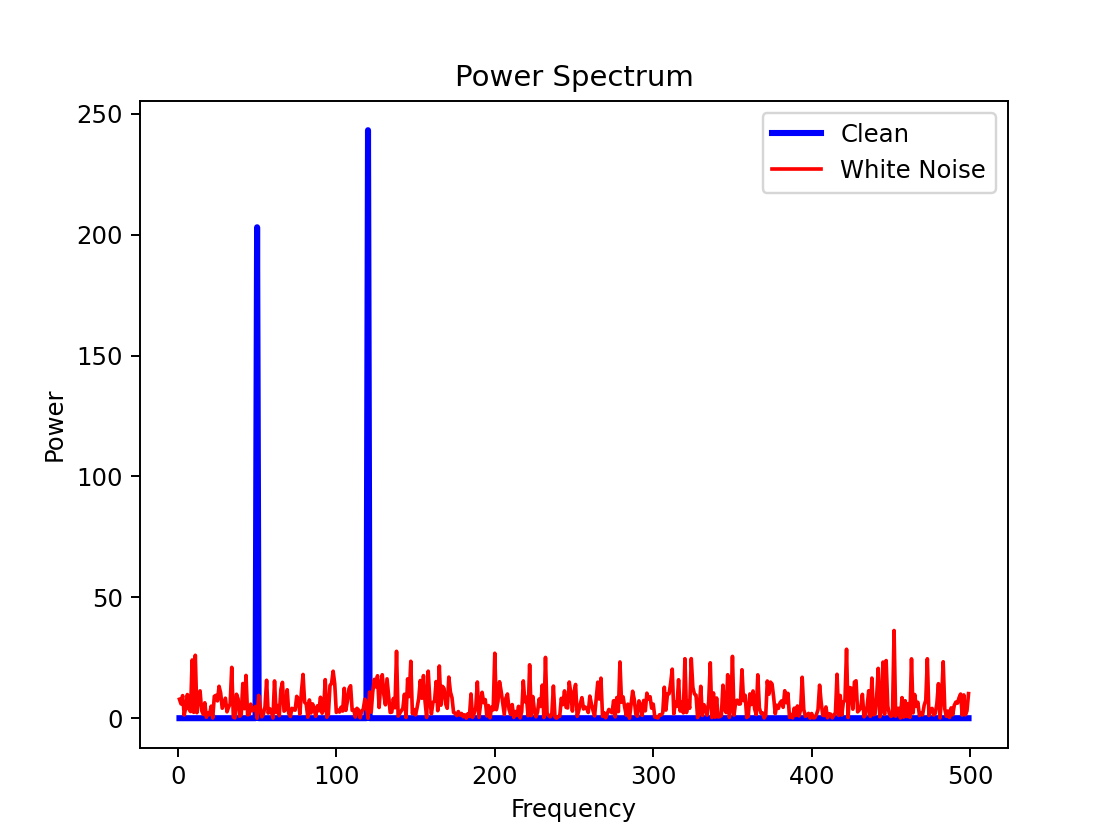

/home/val-ubuntu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/val-ubuntu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [36]:
indices = PSD > 100 
PSD_clean = PSD * indices # zeroes out the Fourier coefficients below 100
PSD_noise = PSD * (PSD < 100)

plt.figure()

plt.plot(frequencies[L], PSD_clean[L], color='blue', lw=2.5, label='Clean')
plt.plot(frequencies[L], PSD_noise[L], color='red', label='White Noise')
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Power Spectrum")
plt.legend()

We keep only the dominant frequencies.

### Take the inverse Fourier transform

<IPython.core.display.Javascript object>


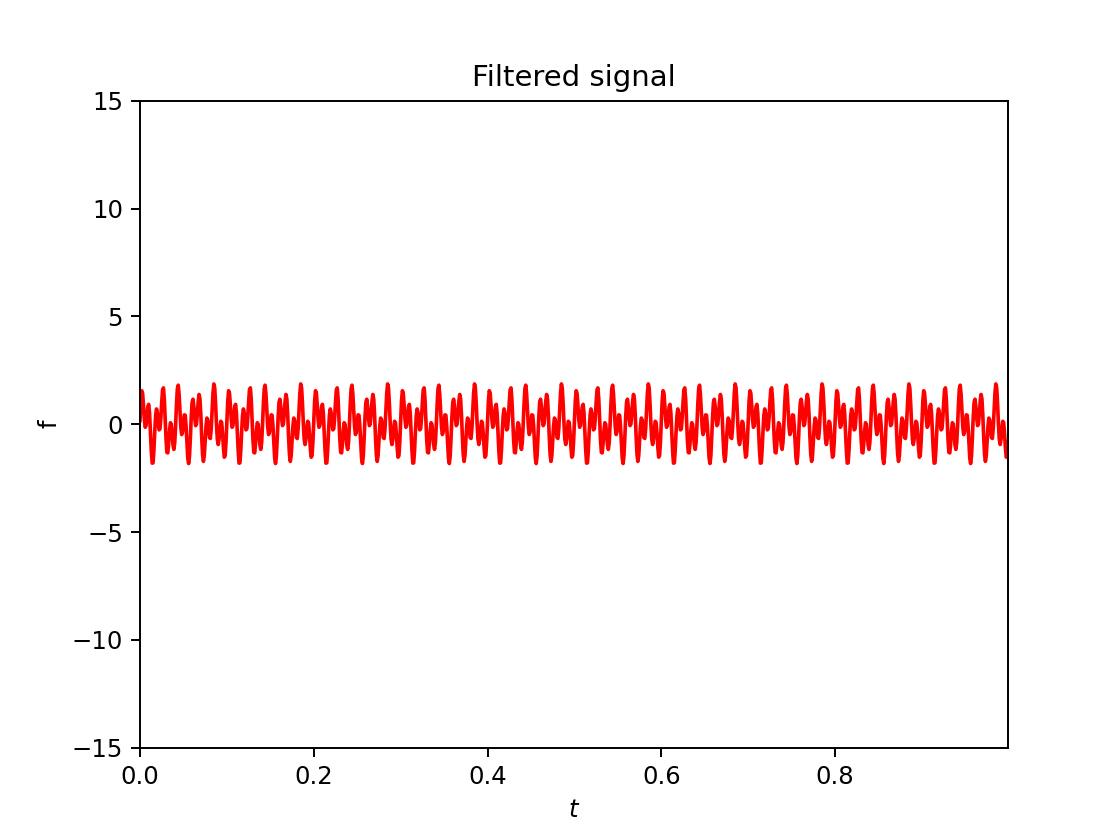

/home/val-ubuntu/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Filtered signal')

In [37]:
fhat_filtered = indices * fhat 
ffilt = np.fft.ifft(fhat_filtered)

plt.figure()
plt.plot(t,ffilt,color='r', lw=1.5)
plt.xlim(t[0], t[-1])
plt.ylim(-15,15)
plt.xlabel(r"$t$")
plt.ylabel(r'f')
plt.title('Filtered signal')

# Birdsong

In [59]:
from scipy.io import wavfile
from IPython.display import Audio
Audio('nightingale.wav')

In [60]:
rate, audio = wavfile.read('nightingale.wav')
audio = np.mean(audio, axis=1)

<IPython.core.display.Javascript object>


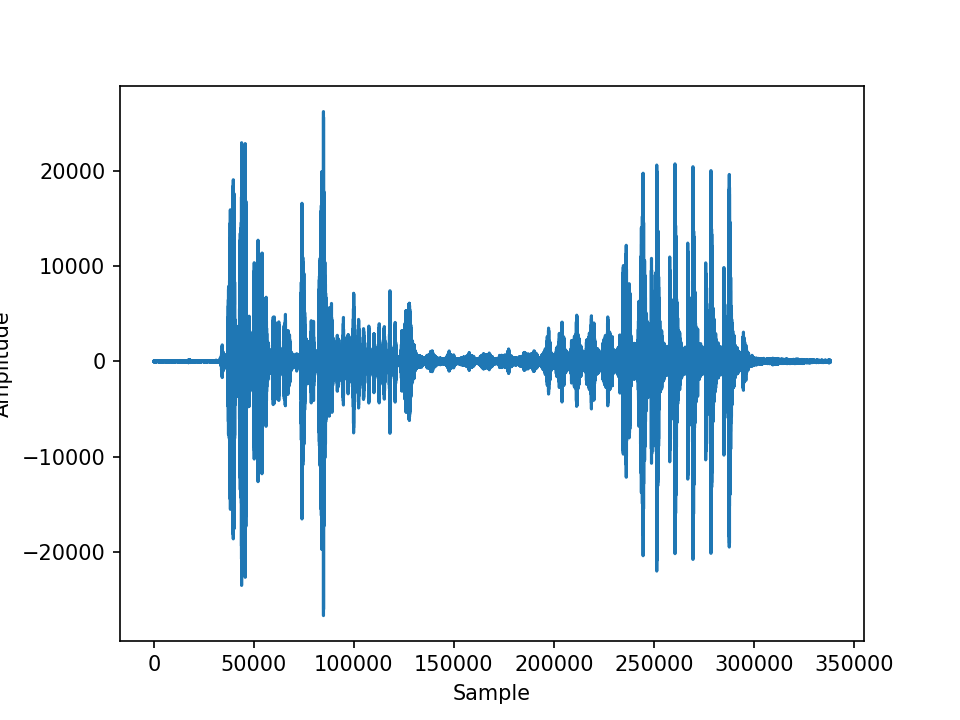

Text(0, 0.5, 'Amplitude')

In [61]:
plt.figure()

plt.plot(audio)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

<IPython.core.display.Javascript object>


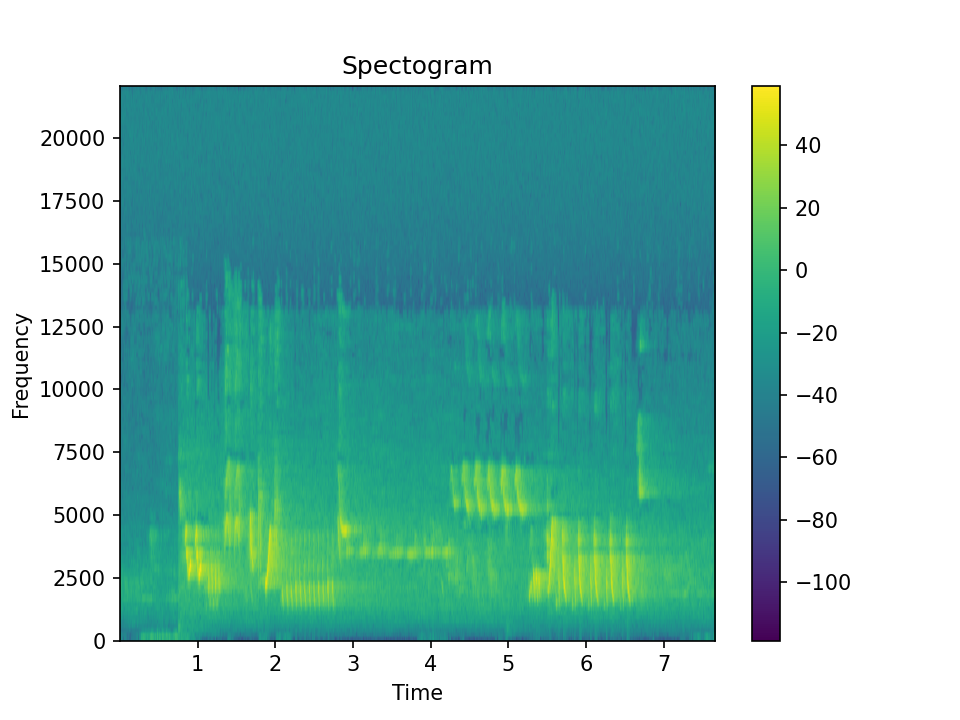

In [66]:
fig, ax = plt.subplots()

v1, v2, v3, v4 = ax.specgram(audio, Fs=rate)
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title("Spectogram")

fig.colorbar(v4)


# Computing derivatives

# Partial Differential Equations